In [149]:
import numpy as np

In [150]:
import sklearn.datasets as datasets

In [151]:
x, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=20,
                                      coef=True, random_state=0)

In [152]:
x = x[:,0]

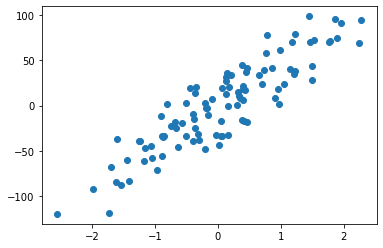

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [154]:
coef

array(42.38550486)

In [155]:
def compute_error_for_line_given_points(b0,b1,x,y):
    N = len(y)
    totalError = (1/N)*np.sum((y-(x*b1+b0))**2)
    return totalError

In [156]:
def step_gradient(b0_current, b1_current, x,y, learning_rate):
    N = len(y)
    b0_grad = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_grad = 2/N * np.sum(-x * (y - ((b1_current * x)+ b0_current)))
    new_b0 = b0_current - (learning_rate*b0_grad)
    new_b1 = b1_current - (learning_rate*b1_grad)
    return new_b0, new_b1

In [157]:
def gradient_descent_runner(x,y,b0,b1,learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0,b1,x,y,learning_rate)
    return b0, b1

In [158]:
b0 = 0

In [159]:
b1 = 0
x.shape

(100,)

In [160]:
y.shape

(100,)

In [161]:
compute_error_for_line_given_points(b0, b1,x, y)

2323.0337018661576

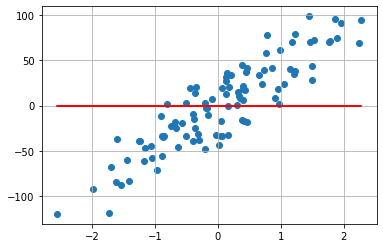

In [162]:
y_ = b0 + b1*x
plt.scatter(x, y)
plt.plot(x,y_, c='r')
plt.grid()

In [163]:
b0, b1 = step_gradient(b0,b1,x,y,0.1)


In [164]:
b0, b1 = gradient_descent_runner(x,y,b0,b1,0.01, 1000)
compute_error_for_line_given_points(b0, b1,x, y)

456.6859446727793

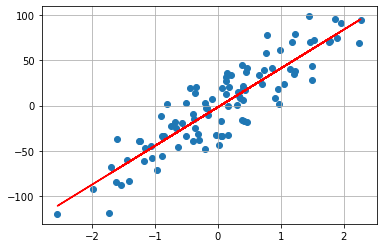

In [165]:
y_ = b0 + b1*x
plt.scatter(x, y)
plt.plot(x,y_, c='r')
plt.grid()

### Explorando  House Prices dataset

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [166]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizando características importantes do dataset

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
#precisa instalar o seaborn

C:\Users\Livia\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


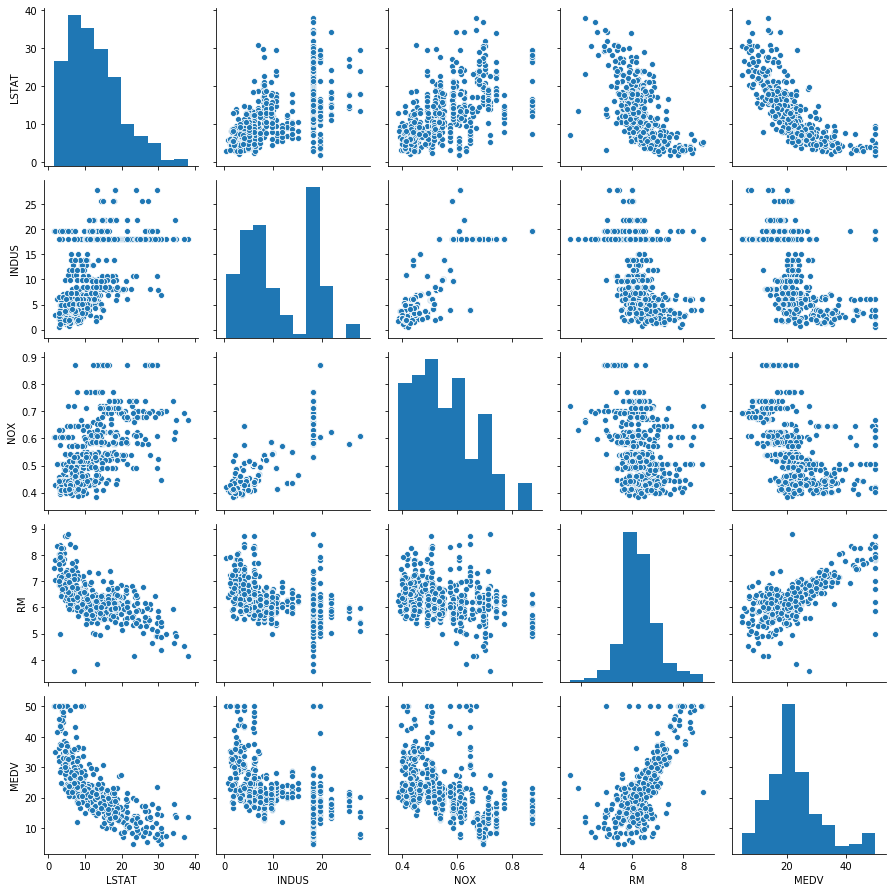

In [168]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

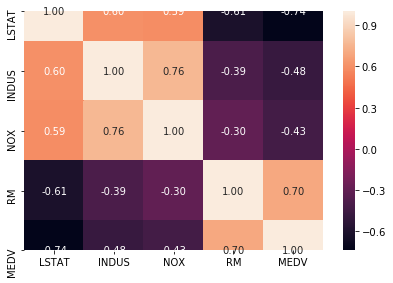

In [169]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

# Utilize uma regressão linear simples, baseada no erro quadrático


Nesta atividade utilize apenas o atributo de maior correlação com o preço para ser a variável independente (x). Use o método GD  e estime o erro utilizando as funções que foram implementadas anteriormente.

In [170]:
X = df[['RM']].values
y = df['MEDV'].values

# SEU CÓDIGO AQUI

In [171]:
#funçao para plotar o resultado
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

## Regressão usando o skcikit learn

In [172]:
from sklearn.linear_model import SGDRegressor

Use o método fit para treinar o modelo e o método predict para obter os valores preditos

In [173]:
slr = SGDRegressor()

# SEU CÓDIGO AQUI


print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 4.537
Intercept: -5.750


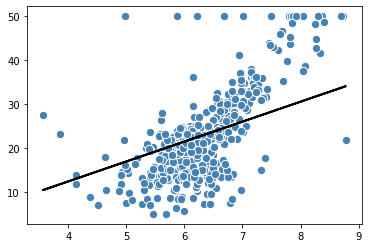

In [174]:
lin_regplot(X, y, slr)

Use o método do scikit learn para calcular o erro

In [179]:
from sklearn.metrics import mean_squared_error

In [1]:
# SEU CÓDIGO AQUI

###  Aplique o mesmo método acima considerando um conjunto maior de atributos   

In [5]:
X = df[['LSTAT', 'INDUS', 'NOX', 'RM']].values # você pode escolher outro conjunto de atributos

NameError: name 'df' is not defined

In [2]:

# SEU CÓDIGO AQUI


In [184]:
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y, y_pred)))

MSE train: %.3f, test: %.3f 15587.436469275493


Que tal usarmos a padronização dos atributos para tentar obter um resultado melhor?

## Scalonamento de atributos

A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina: eles podem se comportar mal se os atributos individuais não parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com 0 média e variação de unidade).


Normalize os atributos removendo a média e escalonando para uma unidade de variância 
Nesse caso, o valor padronizado de x é calculado como:

z = (x - u) / s

Para isso, utilize o módulo StandardScaler do scikit learn. Crie um objeto tipo StandardScaler para aplicar em x, salve o resultado na variavel  e um outro para aplicar e aplique o fit_transform. Para voltar ao dado original use inverse_transform. 

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# SEU CÓDIGO AQUI

NameError: name 'x' is not defined

Treine o modelo com os dados transformados

In [192]:

# SEU CÓDIGO AQUI

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.611
Intercept: -1.202


In [193]:
print('MSE train: %.3f, test: %.3f' , (mean_squared_error(y, y_pred)))

MSE train: %.3f, test: %.3f 30.387432629354727


### Crie novamente um modelo, dessa vez separando os dados de treino e teste. Aplique o Grandiente descendente, plot o resultato, calcule o erro quadrático médio para os dados de teste.